<a href="https://colab.research.google.com/github/raneeyy/Machine-Learning/blob/main/KNN%20Classification%20-%20Online%20Food%20Delivery%20Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/onlinedeliverydata.csv')

In [3]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [4]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of 

In [5]:
df["Monthly Income"].value_counts()

No Income          187
25001 to 50000      69
More than 50000     62
10001 to 25000      45
Below Rs.10000      25
Name: Monthly Income, dtype: int64

In [6]:
for i in range(388):
    if df["Monthly Income"].values[i] == "No Income":
        df["Monthly Income"].values[i] = 0
    elif df["Monthly Income"].values[i] == "Below Rs.10000":
        df["Monthly Income"].values[i] = 5000
    elif df["Monthly Income"].values[i] == "10001 to 25000":
        df["Monthly Income"].values[i] = 15000
    elif df["Monthly Income"].values[i] == "25001 to 50000":
        df["Monthly Income"].values[i] = 30000
    elif df["Monthly Income"].values[i] == "More than 50000":
        df["Monthly Income"].values[i] = 60000        
df[['Monthly Income']].head()

,Monthly Income
0,0
1,5000
2,5000
3,0
4,5000


In [7]:
df["Gender"].value_counts()

Male      222
Female    166
Name: Gender, dtype: int64

In [8]:
df["Marital Status"].value_counts()

Single               268
Married              108
Prefer not to say     12
Name: Marital Status, dtype: int64

In [9]:
df["Occupation"].value_counts()

Student           207
Employee          118
Self Employeed     54
House wife          9
Name: Occupation, dtype: int64

In [10]:
df["Good Taste "].value_counts()

Very Important          178
Important               154
Moderately Important     39
Slightly Important       11
Unimportant               6
Name: Good Taste , dtype: int64

*Encoding Labels*

In [11]:
le_gender = LabelEncoder()
le_gender.fit(['Female','Male'])
df.iloc[:,1] = le_gender.transform(df.iloc[:,1]) 

le_marital = LabelEncoder()
le_marital.fit(['Single', 'Married','Prefer not to say'])
df.iloc[:,2] = le_marital.transform(df.iloc[:,2])

le_occupation = LabelEncoder()
le_occupation.fit([ 'Student', 'Employee','Self Employeed','House wife'])
df.iloc[:,3] = le_occupation.transform(df.iloc[:,3]) 

# Column that will be predicted (Good Taste)
le_goodtaste = LabelEncoder()
le_goodtaste.fit(['Very Important','Important','Moderately Important','Slightly Important','Unimportant'])
df.iloc[:,51] = le_goodtaste.transform(df.iloc[:,51]) 

In [12]:
df_encoded = df
df[['Gender', 'Marital Status', 'Occupation','Good Taste ']].head()

,Gender,Marital Status,Occupation,Good Taste
0,0,2,3,1
1,0,2,3,4
2,1,2,3,4
3,0,2,3,4
4,1,2,3,4


In [13]:
X = df_encoded[['Age','Gender','Marital Status','Occupation','Monthly Income','Family size']].values
y = df_encoded['Good Taste '].values

*Standardization*

In [14]:
X = StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.55761998, -1.15643824,  0.65739091,  0.82675596, -0.77968076,
         0.53292917],
       [-0.2116143 , -1.15643824,  0.65739091,  0.82675596, -0.5501541 ,
        -0.2082053 ],
       [-0.88461714,  0.86472409,  0.65739091,  0.82675596, -0.5501541 ,
        -0.2082053 ],
       [-0.88461714, -1.15643824,  0.65739091,  0.82675596, -0.77968076,
         2.01519811],
       [-0.88461714,  0.86472409,  0.65739091,  0.82675596, -0.5501541 ,
         0.53292917]])

*Splitting Data into Training and Testing Dataset*

In [15]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (310, 6) (310,)
Test set: (78, 6) (78,)


# K-NN Classification on 'Good Taste' review of the customers

In [16]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import metrics 

In [17]:
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.65384615, 0.47435897, 0.55128205, 0.51282051, 0.41025641,
       0.47435897, 0.47435897, 0.47435897, 0.48717949, 0.43589744,
       0.47435897, 0.46153846, 0.43589744, 0.47435897, 0.41025641,
       0.44871795, 0.46153846, 0.48717949, 0.44871795, 0.46153846,
       0.46153846, 0.46153846, 0.47435897, 0.46153846, 0.46153846,
       0.47435897, 0.46153846, 0.47435897, 0.47435897, 0.48717949,
       0.46153846, 0.46153846, 0.48717949, 0.47435897, 0.5       ,
       0.5       , 0.48717949, 0.51282051, 0.48717949, 0.48717949,
       0.47435897, 0.5       , 0.5       , 0.5       , 0.53846154,
       0.51282051, 0.5       , 0.51282051, 0.5       ])

# Best K value

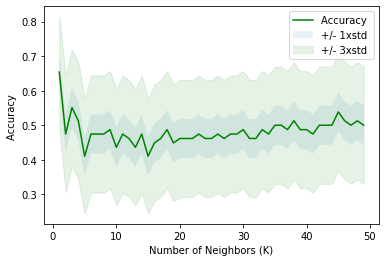

In [18]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.show()

In [19]:
print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6538461538461539 with k= 1
